# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [7]:
import os
from tensorflow.python import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [8]:
train, test = keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [10]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    
    return model
    

In [15]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = 0.95


In [16]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.Adam(lr=lr, epsilon=None, decay=0.0) 
    #optimizer = optimizers.RMSprop(lr=lr, epsilon=None, decay=0.0)
    #optimizer = optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np

50000/50000 [==============================] - 3s 65us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 3s 58us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 3s 66us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 3s 64us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 68us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 67us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model"
_______________________________________________________

Epoch 42/50
50000/50000 [==============================] - 3s 66us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 3s 70us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 3s 69us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 3s 64us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 3s 68us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 3s 69us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 3s 67us/sample - loss: 14.506

50000/50000 [==============================] - 3s 68us/sample - loss: 0.8822 - accuracy: 0.6856 - val_loss: 1.4362 - val_accuracy: 0.5286
Epoch 40/50
50000/50000 [==============================] - 3s 68us/sample - loss: 0.8796 - accuracy: 0.6884 - val_loss: 1.4546 - val_accuracy: 0.5240
Epoch 41/50
50000/50000 [==============================] - 3s 65us/sample - loss: 0.8607 - accuracy: 0.6934 - val_loss: 1.4582 - val_accuracy: 0.5280
Epoch 42/50
50000/50000 [==============================] - 3s 68us/sample - loss: 0.8289 - accuracy: 0.7057 - val_loss: 1.4655 - val_accuracy: 0.5228
Epoch 43/50
50000/50000 [==============================] - 3s 69us/sample - loss: 0.8178 - accuracy: 0.7082 - val_loss: 1.4704 - val_accuracy: 0.5293
Epoch 44/50
50000/50000 [==============================] - 3s 69us/sample - loss: 0.8140 - accuracy: 0.7099 - val_loss: 1.4916 - val_accuracy: 0.5243
Epoch 45/50
50000/50000 [==============================] - 3s 68us/sample - loss: 0.8022 - accuracy: 0.7145 - va

50000/50000 [==============================] - 3s 67us/sample - loss: 1.0871 - accuracy: 0.6211 - val_loss: 1.3233 - val_accuracy: 0.5344
Epoch 37/50
50000/50000 [==============================] - 3s 69us/sample - loss: 1.0757 - accuracy: 0.6241 - val_loss: 1.3322 - val_accuracy: 0.5293
Epoch 38/50
50000/50000 [==============================] - 3s 64us/sample - loss: 1.0645 - accuracy: 0.6284 - val_loss: 1.3370 - val_accuracy: 0.5351
Epoch 39/50
50000/50000 [==============================] - 3s 70us/sample - loss: 1.0615 - accuracy: 0.6299 - val_loss: 1.3274 - val_accuracy: 0.5327
Epoch 40/50
50000/50000 [==============================] - 3s 69us/sample - loss: 1.0482 - accuracy: 0.6342 - val_loss: 1.3197 - val_accuracy: 0.5297
Epoch 41/50
50000/50000 [==============================] - 3s 70us/sample - loss: 1.0335 - accuracy: 0.6409 - val_loss: 1.3268 - val_accuracy: 0.5342
Epoch 42/50
50000/50000 [==============================] - 3s 69us/sample - loss: 1.0257 - accuracy: 0.6442 - va

50000/50000 [==============================] - 3s 68us/sample - loss: 1.5116 - accuracy: 0.4751 - val_loss: 1.5363 - val_accuracy: 0.4618
Epoch 34/50
50000/50000 [==============================] - 4s 70us/sample - loss: 1.5060 - accuracy: 0.4770 - val_loss: 1.5322 - val_accuracy: 0.4604
Epoch 35/50
50000/50000 [==============================] - 3s 64us/sample - loss: 1.5010 - accuracy: 0.4796 - val_loss: 1.5294 - val_accuracy: 0.4620
Epoch 36/50
50000/50000 [==============================] - 3s 67us/sample - loss: 1.4967 - accuracy: 0.4816 - val_loss: 1.5228 - val_accuracy: 0.4666
Epoch 37/50
50000/50000 [==============================] - 3s 67us/sample - loss: 1.4912 - accuracy: 0.4829 - val_loss: 1.5202 - val_accuracy: 0.4671
Epoch 38/50
50000/50000 [==============================] - 3s 68us/sample - loss: 1.4861 - accuracy: 0.4842 - val_loss: 1.5186 - val_accuracy: 0.4668
Epoch 39/50
50000/50000 [==============================] - 3s 68us/sample - loss: 1.4818 - accuracy: 0.4864 - va

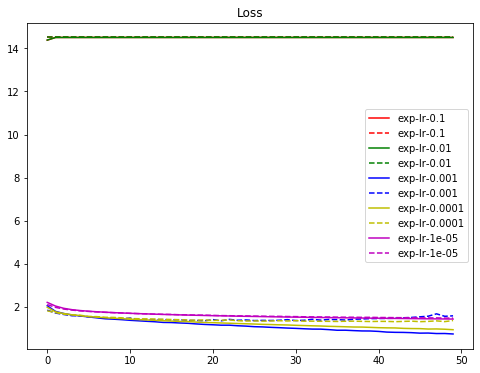

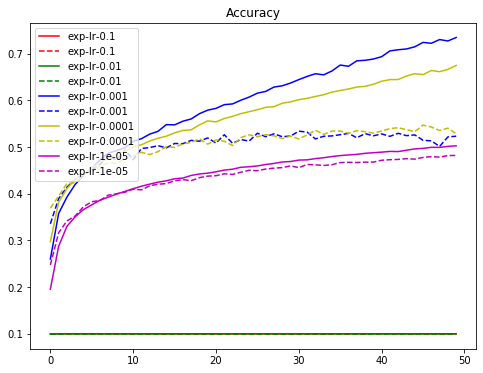

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()